In [74]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import time
d = {'col1': [1,2,3,4,5,6,7,8,9,0,10], 'col2': [1,2,9,16,25,36,49,64,81,0,100]}
df = pd.DataFrame(data=d)
print (df)

    col1  col2
0      1     1
1      2     2
2      3     9
3      4    16
4      5    25
5      6    36
6      7    49
7      8    64
8      9    81
9      0     0
10    10   100


<IPython.core.display.Javascript object>


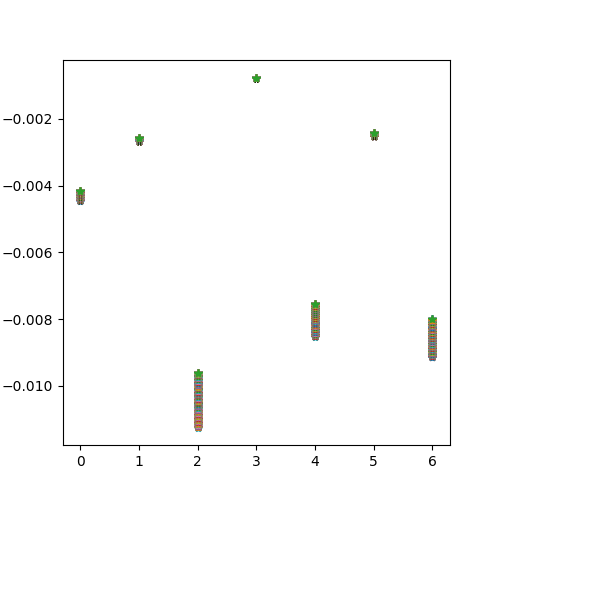

shape: (11, 2)
11
Training data size:  (1, 11)
a4 staring: [[ 0.99556335  0.99556463  0.99556518  0.99556545  0.99556559  0.99556568
   0.99556574  0.99556579  0.99556582  0.99556015  0.99556584]
 [ 0.99732827  0.99732906  0.9973294   0.99732956  0.99732965  0.9973297
   0.99732974  0.99732976  0.99732978  0.99732628  0.9973298 ]
 [ 0.98882116  0.98882311  0.98882394  0.98882434  0.98882457  0.9888247
   0.9888248   0.98882486  0.98882491  0.98881634  0.98882495]
 [ 0.99922812  0.99922838  0.99922849  0.99922855  0.99922858  0.99922859
   0.99922861  0.99922862  0.99922862  0.99922748  0.99922863]
 [ 0.99151552  0.99151741  0.99151821  0.99151859  0.9915188   0.99151893
   0.99151902  0.99151908  0.99151912  0.99151079  0.99151916]
 [ 0.99749573  0.99749642  0.99749671  0.99749686  0.99749694  0.99749698
   0.99749702  0.99749704  0.99749706  0.99749403  0.99749707]
 [ 0.99091784  0.99091983  0.99092067  0.99092108  0.99092131  0.99092145
   0.99092154  0.9909216   0.99092165  0.990912

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def softmax(x):
    t=np.exp(x)
    sum1=np.sum(t,axis=0)
    return t/sum1
learning_rate=0.1
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
df.describe
X_input_data=df.values
X_training_data=np.transpose(X_input_data[:,:-1]) #Please check labels should be in last column

print ("shape:",X_input_data.shape)
Y_label=np.transpose(X_input_data[:,-1])
training_count=X_training_data.shape[1]
#features=X_training_data.shape[0]
print (training_count)


print ('Training data size: ',X_training_data.shape) 
#print ('Describe: ',df.describe())
Features=X_training_data.shape[0]
dict_layers={1:15,2:12,3:10,4:7}
w1=np.random.uniform(1,0,size=(dict_layers[1],Features))
z1=np.dot(w1,X_training_data)
a1=sigmoid(z1)

w2=np.random.uniform(1,0,size=(dict_layers[2],w1.shape[0]))
z2=np.dot(w2,a1)
a2=sigmoid(z2)

w3=np.random.uniform(1,0,size=(dict_layers[3],w2.shape[0]))
z3=np.dot(w3,a2)
a3=sigmoid(z3)

w4=np.random.uniform(1,0,size=(dict_layers[4],w3.shape[0]))
z4=np.dot(w4,a3)
a4=sigmoid(z4)
print ("a4 staring:",a4)


#print ("a4:",a4)
output=softmax(a4)
y1=np.array([1,0,0,0,0,0,0]).reshape(7,1)
y2=np.array([0,1,0,0,0,0,0]).reshape(7,1)
y3=np.array([0,0,1,0,0,0,0]).reshape(7,1)
y4=np.array([0,0,0,1,0,0,0]).reshape(7,1)
y5=np.array([0,0,0,0,1,0,0]).reshape(7,1)
y6=np.array([0,0,0,0,0,1,0]).reshape(7,1)
y6=np.array([0,0,0,0,0,0,1]).reshape(7,1)
for i in range(1000):
    loss=(np.log(a4))
####print (loss)

## back propagation
#print (a4.shape)
#print (w4.shape)
    dz4=-np.exp(-z4)
    dw4=np.dot(dz4,np.transpose(a3))
    w4=w4-(.01*(dw4/X_training_data.shape[1]))
    #print (np.around(np.log(a4),2))
    if np.around(np.log(a4),2).all== 0.00:
        print ("counter:",i)
        break
    dz3=-np.exp(-z3)
    dw3=np.dot(dz3,np.transpose(a2))
    w3=w3-(.01*(dw3/X_training_data.shape[1]))
    dz2=-np.exp(-z2)
    dw2=np.dot(dz2,np.transpose(a1))
    w2=w2-(.01*(dw2/X_training_data.shape[1]))
    dz1=-np.exp(-z1)
    dw1=np.dot(dz1,np.transpose(X_training_data))
    w1=w1-(.01*(dw1/X_training_data.shape[1]))
    z1=np.dot(w1,X_training_data)
    a1=sigmoid(z1)
    z2=np.dot(w2,a1)
    a2=sigmoid(z2)
    z3=np.dot(w3,a2)
    a3=sigmoid(z3)
    z4=np.dot(w4,a3)
    a4=sigmoid(z4)
    ax.plot(loss,'*')
    fig.canvas.draw()
    
    
    

    
loss=(np.log(a4))
print ("loss:",loss)
output=np.sum(softmax(a4),axis=0)
print ("a4 after:",a4)
#print ("output:",a4)
#print ("sum:",output)


'''print (dw1)
print (w1)
print (z4.shape)
print (dw4.shape)
#print (Features)
#dw4=
#dw4=
#print (a4.shape)
#for i in w4:
#    dw4=a4-1 '''

x_test=np.array([])







In [43]:
total_weights=X_training_data.shape[0]*dict_layers[1]+dict_layers[1]*dict_layers[2]+dict_layers[3]*dict_layers[4]
weights=np.random.uniform(1,0,size=(total_weights,1))
A=[]
Z=[]

In [45]:
for i in range(4):
    z.append(weights[dict_layers[1]*X_training_data.shape[0]].reshape()

265

(array([[ -3.57546882e-01,  -2.36483787e-01,  -1.47030711e-01,
          -8.75351281e-02,  -5.06837441e-02,  -2.88557954e-02,
          -1.62673926e-02,  -9.11913983e-03,  -5.09571688e-03,
          -5.00000000e-01,  -2.84236185e-03],
        [ -3.10574948e-01,  -1.68700459e-01,  -8.37618843e-02,
          -3.95539990e-02,  -1.82143421e-02,  -8.28822700e-03,
          -3.75079663e-03,  -1.69316365e-03,  -7.63453450e-04,
          -5.00000000e-01,  -3.44067903e-04],
        [ -4.61806455e-01,  -4.24056043e-01,  -3.87171565e-01,
          -3.51537115e-01,  -3.17483286e-01,  -2.85277042e-01,
          -2.55116680e-01,  -2.27131645e-01,  -2.01386473e-01,
          -5.00000000e-01,  -1.77887827e-01],
        [ -3.93270571e-01,  -2.95843470e-01,  -2.14037935e-01,
          -1.50033243e-01,  -1.02668000e-01,  -6.90412686e-02,
          -4.58653175e-02,  -3.02166176e-02,  -1.97962915e-02,
          -5.00000000e-01,  -1.29215778e-02],
        [ -4.59244017e-01,  -4.19026042e-01,  -3.79856043e-0